# Welcome to Jupyter!

Exercício 1
Tarefa 1

In [1]:
from math import factorial as fac
from math import sin, cos, pi, log10

In [2]:
def r(x):
    return -pi**2*(sin(pi*x) + cos(pi*x))

In [3]:
def binom(a, b):
    return fac(a)/(fac(b)*fac(a - b))

In [4]:
def legendre_pol(index, x):
    return sum([binom(index, i)*binom(index+i, i)*((x - 1)/2)**i for i in range(index+1)])

In [5]:
x_given = 0.7688
for i in range(0, 11):
    print(f'P_{i} = {legendre_pol(i, x_given)}')

P_0 = 1.0
P_1 = 0.7688
P_2 = 0.38658016000000006
P_3 = -0.017195288319999863
P_4 = -0.3130696609057276
P_5 = -0.4194820888917828
P_6 = -0.3303546374685648
P_7 = -0.11211483648073199
P_8 = 0.1274467709980197
P_9 = 0.28473300112016964
P_10 = 0.30121309549804387


Exercício 1 
Tarefa 2
Item 1

In [6]:
def integral_trapezoidal(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h

In [7]:
initial = -1
final = 1
num_divs = 10000

def get_alfa(k, num_divs = 10000):
    return (2*k - 1)/2*integral_trapezoidal(lambda x: r(x)*legendre_pol(k-1, x), initial, final, num_divs)

In [8]:
for i in range(1, 10):
    print(f'α_{i} = {get_alfa(i)}')

α_1 = 4.621192317699751e-16
α_2 = -9.424777650706595
α_3 = 15.000000493480254
α_4 = 11.431390197649232
α_5 = -5.748515581127785
α_6 = -2.1642999434215944
α_7 = 0.6525329066146618
α_8 = 0.16425414113053774
α_9 = -0.03549414764834449


Exercício 1
Tarefa 2
Item 2

In [9]:
def legendre_2_linhas(index, x):
    return sum([binom(index, i)*binom(index+i, i)*((x - 1)/2)**(i + 2)*4/((i+1)*(i+2)) for i in range(index+1)])

In [10]:
def F_grande(x, k):
    return sum([get_alfa(i)*legendre_2_linhas(i-1, x) for i in range(1,k+1)])

In [11]:
def G_k(x, k):
    return F_grande(x, k) + (-1 - F_grande(-1, k))*(1 - x)/2 + (-1 - F_grande(1, k))*(x + 1)/2

In [12]:
for i in [-1, -.7, 0, .3, 1]:
    print(f'G_4({i}) = {G_k(i, 4)}')

G_4(-1) = -1.0
G_4(-0.7) = -1.3332509058335167
G_4(0) = 0.8750000616850317
G_4(0.3) = 1.336502467538775
G_4(1) = -1.0


In [13]:
for i in [-1, -.7, 0, .3, 1]:
    print(f'G_7({i}) = {G_k(i, 7)}')

G_7(-1) = -1.0
G_7(-0.7) = -1.3972325326982244
G_7(0) = 0.9998587162914496
G_7(0.3) = 1.3962393621197444
G_7(1) = -1.0


Exercício 1
Tarefa 2
Item 3

In [14]:
import numpy as np

In [15]:
k_max_erro = 30
k_min_erro = 2
alfas = {
    'trapezoidal': {
        'm10^4': np.array([get_alfa(i) for i in range(1, k_max_erro+2)]),
        'm10^5': np.array([get_alfa(i, 100000) for i in range(1, k_max_erro+2)])
    }
}

In [16]:
num_subintervalos = 10117
subintervalos_x = np.array([initial + i*(final - initial)/num_subintervalos for i in range(num_subintervalos+1)])

In [17]:
y_of_x_exato = np.sin(np.pi*subintervalos_x) + np.cos(np.pi*subintervalos_x)

In [18]:
def F_grande_otimizado(x, k, alfa_vec):
    ints_legendre = np.array([legendre_2_linhas(i-1, x) for i in range(1,k+1)])
    return np.sum(alfa_vec[:k]*ints_legendre)

In [19]:
def G_k_otimizado(x, k, alfa_vec):
    return F_grande_otimizado(x, k, alfa_vec) + (-1 - F_grande_otimizado(-1, k, alfa_vec))*(1 - x)/2 + (-1 - F_grande_otimizado(1, k, alfa_vec))*(x + 1)/2

In [20]:
erros_m_k = {
    "trapezio": {
        "m10^4": [],
        "m10^5": [],
    },
    "simpson": {
        "m10^5": []
    }
}

In [21]:
# trapezoidal para m = 10^4
for k in range(k_min_erro, k_max_erro+1):
    G_k = np.array([G_k_otimizado(i, k+1, alfas['trapezoidal']['m10^4']) for i in subintervalos_x])
    erros_m_k['trapezio']['m10^4'].append({'k': k, 'erro': max(np.abs(y_of_x_exato - G_k))})
    print(f'E_{k} = {max(np.abs(y_of_x_exato - G_k))}')

E_2 = 0.46592651878431646
E_3 = 0.12912437628181284
E_4 = 0.026908477291985977
E_5 = 0.0053396843246762415
E_6 = 0.0009090280624887148
E_7 = 0.00014303110784186224
E_8 = 2.0263925892660684e-05
E_9 = 2.6573173446120535e-06
E_10 = 3.5305506806970754e-07
E_11 = 6.40173428712032e-08
E_12 = 8.180755894926506e-08
E_13 = 8.179986776823966e-08
E_14 = 8.54146604556405e-08
E_15 = 8.54125279392548e-08
E_16 = 9.163093039887826e-08
E_17 = 1.1664459220739332e-07
E_18 = 1.47313724996323e-07
E_19 = 3.7749982473300747e-07
E_20 = 3.286126595281047e-06
E_21 = 7.948200134277883e-06
E_22 = 0.0010756382054251112
E_23 = 0.01409043708730029
E_24 = 22.155256507026994
E_25 = 570.2819041079003
E_26 = 35359.7727102387
E_27 = 406602.79273860244
E_28 = 24181296.86367686
E_29 = 636142829.7145782
E_30 = 30688537033.548386


Exercício 1 
Tarefa 3 
Item 1

In [22]:
# trapezoidal para m = 10^5
for k in range(k_min_erro, k_max_erro+1):
    G_k = np.array([G_k_otimizado(i, k+1, alfas['trapezoidal']['m10^5']) for i in subintervalos_x])
    erros_m_k['trapezio']['m10^5'].append({'k': k, 'erro': max(np.abs(y_of_x_exato - G_k))})
    print(f'E_{k} = {max(np.abs(y_of_x_exato - G_k))}')

E_2 = 0.4659264645443688
E_3 = 0.12912443912721372
E_4 = 0.026908451108702436
E_5 = 0.005339683753535329
E_6 = 0.0009089939546561565
E_7 = 0.00014310075977785885
E_8 = 2.0230785041652766e-05
E_9 = 2.6488828452908564e-06
E_10 = 3.1898339586389213e-07
E_11 = 3.49643187735893e-08
E_12 = 4.117247875967678e-09
E_13 = 1.1713252590084267e-09
E_14 = 9.251731603043822e-10
E_15 = 9.236468256901276e-10
E_16 = 2.084169503646649e-09
E_17 = 5.393984925383677e-09
E_18 = 3.455412822539472e-08
E_19 = 1.469955737132267e-07
E_20 = 4.06282236742328e-07
E_21 = 3.1406752970752905e-05
E_22 = 0.00019478657379212727
E_23 = 0.02336954546584491
E_24 = 20.296164466740635
E_25 = 558.2423751785165
E_26 = 35898.25891033959
E_27 = 471753.4791561888
E_28 = 22986211.804461557
E_29 = 578430699.5353423
E_30 = 32100853193.84539


Exercício 1 
Tarefa 3
Item 2

In [23]:
def simpson(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/3.0
    for i in range(1, n, 2):
        s += (4/3)*f(a + i*h)
    for i in range(2, n, 2):
        s += (2/3)*f(a + i*h)
    s += f(b)/3.0
    return s * h

In [24]:
def get_alfa_simpson(k, num_divs = 100000):
    return (2*k - 1)/2*simpson(lambda x: r(x)*legendre_pol(k-1, x), initial, final, num_divs)

In [25]:
alfas['simpson'] = {'m10^5': np.array([get_alfa_simpson(i) for i in range(1, k_max_erro+2)])}

In [26]:
# simpson para m = 10^5
for k in range(k_min_erro, k_max_erro+1):
    G_k = np.array([G_k_otimizado(i, k+1, alfas['simpson']['m10^5']) for i in subintervalos_x])
    erros_m_k['simpson']['m10^5'].append({'k': k, 'erro': max(np.abs(y_of_x_exato - G_k))})
    print(f'E_{k} = {max(np.abs(y_of_x_exato - G_k))}')

E_2 = 0.4659264639964724
E_3 = 0.12912443976203702
E_4 = 0.026908450844204235
E_5 = 0.005339683747789259
E_6 = 0.0009089936101108753
E_7 = 0.00014310146335549945
E_8 = 2.023045039911686e-05
E_9 = 2.6487976720890316e-06
E_10 = 3.186699403245896e-07
E_11 = 3.57451670485176e-08
E_12 = 3.736309150959016e-09
E_13 = 3.710391993649864e-10
E_14 = 7.363731846510291e-11
E_15 = 7.241496291499061e-11
E_16 = 2.7530165924716243e-09
E_17 = 4.417372301279698e-09
E_18 = 4.106883810806039e-08
E_19 = 1.3575225277229208e-07
E_20 = 3.705187689995171e-07
E_21 = 2.773243848164242e-05
E_22 = 0.00015433118016772163
E_23 = 0.01834236333715933
E_24 = 20.662625710410477
E_25 = 553.7962969555015
E_26 = 35938.55778544909
E_27 = 479080.26249013096
E_28 = 22791220.80856805
E_29 = 573551310.3579627
E_30 = 32399766647.171005


Exercício 1
Tarefa 3
Item 3

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

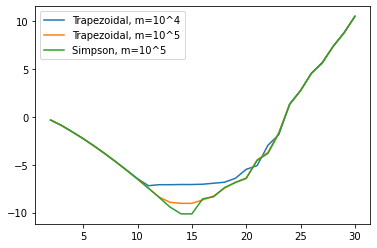

In [28]:
ks = list(map(lambda x: x.get('k'), erros_m_k['trapezio']['m10^4']))
erros_trap_10_4 = list(map(lambda x: log10(x.get('erro')), erros_m_k['trapezio']['m10^4']))
erros_trap_10_5 = list(map(lambda x: log10(x.get('erro')), erros_m_k['trapezio']['m10^5']))
erros_simp_10_5 = list(map(lambda x: log10(x.get('erro')), erros_m_k['simpson']['m10^5']))
plt.plot(ks,erros_trap_10_4, label='Trapezoidal, m=10^4') 
plt.plot(ks,erros_trap_10_5, label='Trapezoidal, m=10^5') 
plt.plot(ks,erros_simp_10_5, label='Simpson, m=10^5') 
plt.legend()
plt.show()

In [29]:
erros_m_k

{'trapezio': {'m10^4': [{'k': 2, 'erro': 0.46592651878431646},
   {'k': 3, 'erro': 0.12912437628181284},
   {'k': 4, 'erro': 0.026908477291985977},
   {'k': 5, 'erro': 0.0053396843246762415},
   {'k': 6, 'erro': 0.0009090280624887148},
   {'k': 7, 'erro': 0.00014303110784186224},
   {'k': 8, 'erro': 2.0263925892660684e-05},
   {'k': 9, 'erro': 2.6573173446120535e-06},
   {'k': 10, 'erro': 3.5305506806970754e-07},
   {'k': 11, 'erro': 6.40173428712032e-08},
   {'k': 12, 'erro': 8.180755894926506e-08},
   {'k': 13, 'erro': 8.179986776823966e-08},
   {'k': 14, 'erro': 8.54146604556405e-08},
   {'k': 15, 'erro': 8.54125279392548e-08},
   {'k': 16, 'erro': 9.163093039887826e-08},
   {'k': 17, 'erro': 1.1664459220739332e-07},
   {'k': 18, 'erro': 1.47313724996323e-07},
   {'k': 19, 'erro': 3.7749982473300747e-07},
   {'k': 20, 'erro': 3.286126595281047e-06},
   {'k': 21, 'erro': 7.948200134277883e-06},
   {'k': 22, 'erro': 0.0010756382054251112},
   {'k': 23, 'erro': 0.01409043708730029},
  

Exercício 1
Tarefa 4
Item 1

In [95]:
import pandas as pd

In [96]:
matriz_coef = np.zeros([16,16])
matriz_indep = np.zeros([16,1])
for i in range(0,16):
    for j in range (0,16):
        for k in range (2,17):
            matriz_coef[i,j] += legendre_pol(i, k)*legendre_pol(j, k)
            matriz_indep[i,0] += legendre_pol(i, k)*(erros_simp_10_5[k])
Df_Mcoef = pd.DataFrame(matriz_coef)
Df_Mindep = pd.DataFrame(matriz_indep)
print("Matriz dos coeficientes:")
print (Df_Mcoef)
print("\n Matriz dos termos independentes:")
print(Df_Mindep)

Matriz dos coeficientes:
              0             1             2             3             4   \
0   1.500000e+01  1.350000e+02  2.235000e+03  4.603500e+04  1.061230e+06   
1   1.350000e+02  1.495000e+03  2.767500e+04  6.073750e+05  1.457721e+07   
2   2.235000e+03  2.767500e+04  5.464170e+05  1.248952e+07  3.082432e+08   
3   4.603500e+04  6.073750e+05  1.248952e+07  2.935504e+08  7.393631e+09   
4   1.061230e+06  1.457721e+07  3.082432e+08  7.393631e+09  1.891219e+11   
5   2.620215e+07  3.700427e+08  7.985626e+09  1.945283e+11  5.036516e+12   
6   6.775273e+08  9.764074e+09  2.139956e+11  5.276463e+12  1.379505e+14   
7   1.811082e+10  2.650492e+11  5.879896e+12  1.464000e+14  3.858280e+15   
8   4.963744e+11  7.352645e+12  1.647116e+14  4.133980e+15  1.096771e+17   
9   1.387223e+13  2.074915e+14  4.685506e+15  1.183848e+17  3.158563e+18   
10  3.937871e+14  5.937143e+15  1.349681e+17  3.429392e+18  9.193931e+19   
11  1.132193e+16  1.718396e+17  3.928487e+18  1.003002e+20  2.7

Exercício 1
Tarefa 4
Item 2

In [97]:
# Função que executa o método da Eliminação de Gauss para um sistema genérico
def EliminacaoDeGauss(coeff, resultado):    
    
    # Checa se o sistema não tem mais     
    m, n = coeff.shape 
    if ( m < n ):
        print("Não há soluções únicas")
    else:
        
        # Matriz auxiliar de 0s para construção de matriz escalonada        
        l = np.zeros((n,n))
        
        # Checa se há algum 0 na diagonal da matriz de coeficientesz        
        for i in range(n):
            if (coeff[i][i] == 0):
                print("Sistema impossível")
        
        # Iteração para aplicação do método        
        for k in range(n - 1):         
            for i in range(k + 1, n):
                # Razão entre os coeficientes                
                l[i][k] = coeff[i][k] / coeff[k][k]         
                for j in range(m):
                    # Coeficiente para eliminar a linha                     
                    coeff[i][j] = coeff[i][j] - l[i][k] * coeff[k][j]
                # Mesma soma no vetor de termos independentes                
                resultado[i] = resultado[i] - l[i][k] * resultado[k]
        
        # Vetor de soluções a ser preenchido                  
        x = np.zeros(n)                                            
        x[n - 1] = resultado[n - 1] / coeff[n - 1][n - 1]  

        # Preenchimento dos resultados de trás para frente (Somando os resultados anteriores)
        for i in range(n - 2, -1, -1):             
            for j in range(i + 1, n):
                resultado[i] -= coeff[i][j] * x[j] 
            x[i] = resultado[i] / coeff[i][i]
            
        return x
    


In [104]:
result_alfa = EliminacaoDeGauss(matriz_coef, matriz_indep)
for i in range(1,17):
    print(f'α_{i} = {result_alfa[i-1]}')

α_1 = 845077615319.0846
α_2 = 116920021343.2258
α_3 = -16248348823.702839
α_4 = 1176669597.0555415
α_5 = -53924229.53877796
α_6 = 1717174.0043179507
α_7 = -40044.18755205944
α_8 = 704.8509396038254
α_9 = -9.515334493965478
α_10 = 0.09940210806810618
α_11 = -0.0008140189489535309
α_12 = 5.286820505794087e-06
α_13 = -2.5571263859633762e-08
α_14 = 8.175230541119064e-11
α_15 = -3.1413394832031384e-13
α_16 = 4.2699659528734087e-16
